In [32]:
%matplotlib notebook

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import json
import requests
import datetime as dt

In [34]:
# Import ems data from csv
ems_df = pd.read_csv("EMS_DATA.csv")
ems_df = ems_df.rename(columns={"GROUP_DATE":"Date"})
ems_df.head()

,Date,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE
0,01/01/2016,4879,4.139373
1,01/01/2017,4928,4.196226
2,01/01/2018,4653,4.137975
3,01/02/2016,3439,4.165455
4,01/02/2017,3685,4.181818


In [35]:
# Import moon data from csv
moon_df = pd.read_csv("Moon_Data.csv")
del moon_df["Unnamed: 0"]
moon_df.head()

,Date,Phase
0,1/2/2016,Last Quarter
1,1/10/2016,New Moon
2,1/16/2016,First Quarter
3,1/24/2016,Full Moon
4,2/1/2016,Last Quarter


In [36]:
# Change the date to a datetime object
moon_df['DATETIME']= pd.to_datetime(moon_df['Date'])
moon_df= moon_df.astype({'DATETIME': 'datetime64'})
moon_df['GROUP_DATE']= moon_df['DATETIME'].dt.strftime("%Y/%m/%d")
moon_df.head()

,Date,Phase,DATETIME,GROUP_DATE
0,1/2/2016,Last Quarter,2016-01-02,2016/01/02
1,1/10/2016,New Moon,2016-01-10,2016/01/10
2,1/16/2016,First Quarter,2016-01-16,2016/01/16
3,1/24/2016,Full Moon,2016-01-24,2016/01/24
4,2/1/2016,Last Quarter,2016-02-01,2016/02/01


In [37]:
# Merge tables
darkside = pd.merge(ems_df, moon_df, on="Date", how="left")

#Clean up table
darkside = darkside.rename(columns={"INITIAL_SEVERITY_LEVEL_CODE":"Initial Severity Level Code", "INCIDENT_DATETIME":"Incident Count", "Phase": "Moon Phase"})
darkside

,Date,Incident Count,Initial Severity Level Code,Moon Phase,DATETIME,GROUP_DATE
0,01/01/2016,4879,4.139373,NaN,NaT,NaN
1,01/01/2017,4928,4.196226,NaN,NaT,NaN
2,01/01/2018,4653,4.137975,NaN,NaT,NaN
3,01/02/2016,3439,4.165455,NaN,NaT,NaN
4,01/02/2017,3685,4.181818,NaN,NaT,NaN
5,01/02/2018,4242,4.166667,NaN,NaT,NaN
6,01/03/2016,3433,4.230702,NaN,NaT,NaN
7,01/03/2017,4302,4.205486,NaN,NaT,NaN
8,01/03/2018,4602,4.228162,NaN,NaT,NaN
9,01/04/2016,3707,4.241705,NaN,NaT,NaN


<IPython.core.display.Javascript object>


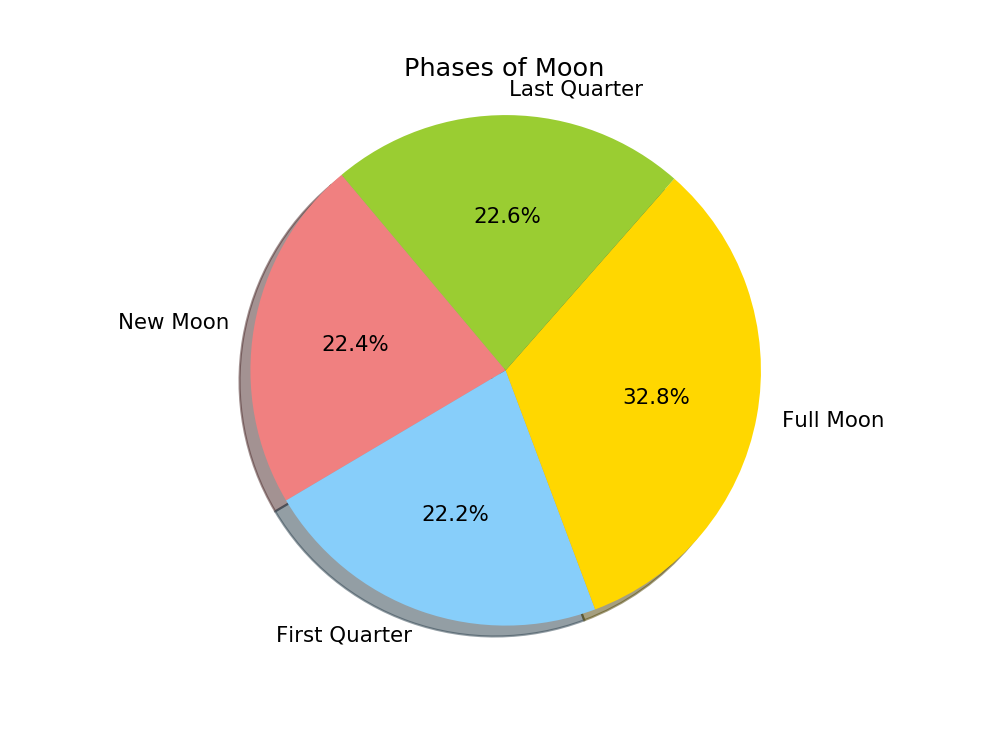

In [45]:
# calculating the percentage of total incident count by phases of moon
phase_percent = darkside.groupby(["Moon Phase"]).sum()["Incident Count"] / darkside["Incident Count"].sum() * 100


# building a pie-chart
plt.pie(phase_percent,
        labels = ["New Moon", "First Quarter", "Full Moon", "Last Quarter"],
        colors = ["lightcoral", "lightskyblue", "gold", "yellowgreen"],
        explode = [0, 0, 0, 0],
        autopct = "%1.1f%%",
        shadow = True,
        startangle = 130)

plt.title("Phases of Moon")

plt.axis("equal")

# saving the image
#plt.savefig("../../../../phases of moon.png")

plt.show()